# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name =[]
latitude = []
longtitude = []
temperature = []
temp_max=[]
humidity = []
cloudiness = []
wind_speed  = []
timezone = []
country = []

counter = 0

baseurl = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&units=imperial" + "&q="

print("Beginning Data Retrieval")
print("-----------------------------")



for city in cities:

    counter = counter + 1
    print(f"Processing Record {counter} | {city} ")
    
    try:
        city_response = requests.get(baseurl + city).json()
        city_name.append(city_response['name'])
        latitude.append(city_response['coord']['lat'])
        longtitude.append(city_response['coord']['lon'])
        temperature.append(city_response['main']['temp'])
        temp_max.append(city_response['main']['temp_max'])
        humidity.append(city_response['main']['humidity'])
        cloudiness.append(city_response['clouds']['all'])
        wind_speed.append(city_response['wind']['speed'])
        country.append(city_response['sys']['country'])
        timezone.append(city_response['timezone'])
    except KeyError:
        print(f"{city} cannot be found in open weathermap")
        pass
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | sao filipe 
Processing Record 2 | kosa 
Processing Record 3 | atuona 
Processing Record 4 | vilcun 
Processing Record 5 | rikitea 
Processing Record 6 | mataura 
Processing Record 7 | strezhevoy 
Processing Record 8 | cape town 
Processing Record 9 | maloy 
Processing Record 10 | torbay 
Processing Record 11 | chandpur 
Processing Record 12 | severo-kurilsk 
Processing Record 13 | port alfred 
Processing Record 14 | hilo 
Processing Record 15 | punta arenas 
Processing Record 16 | souillac 
Processing Record 17 | burley 
Processing Record 18 | taolanaro 
taolanaro cannot be found in open weathermap
Processing Record 19 | tumannyy 
tumannyy cannot be found in open weathermap
Processing Record 20 | iqaluit 
Processing Record 21 | barrhead 
Processing Record 22 | bethel 
Processing Record 23 | tuktoyaktuk 
Processing Record 24 | qaanaaq 
Processing Record 25 | busselton 
Processing Record 26 | emba 
Processing Re

Processing Record 213 | nanakuli 
Processing Record 214 | ruatoria 
ruatoria cannot be found in open weathermap
Processing Record 215 | gondanglegi 
Processing Record 216 | liwale 
Processing Record 217 | bredasdorp 
Processing Record 218 | pevek 
Processing Record 219 | klaksvik 
Processing Record 220 | pangnirtung 
Processing Record 221 | qasigiannguit 
Processing Record 222 | lompoc 
Processing Record 223 | kruisfontein 
Processing Record 224 | vaitape 
Processing Record 225 | gat 
Processing Record 226 | bathsheba 
Processing Record 227 | kutum 
Processing Record 228 | severodvinsk 
Processing Record 229 | kuito 
Processing Record 230 | morant bay 
Processing Record 231 | floro 
Processing Record 232 | karatuzskoye 
Processing Record 233 | plettenberg bay 
Processing Record 234 | linxia 
Processing Record 235 | mantua 
Processing Record 236 | amderma 
amderma cannot be found in open weathermap
Processing Record 237 | hasaki 
Processing Record 238 | juneau 
Processing Record 239 | a

Processing Record 434 | san quintin 
Processing Record 435 | ostuman 
ostuman cannot be found in open weathermap
Processing Record 436 | warrnambool 
Processing Record 437 | newport 
Processing Record 438 | yauya 
Processing Record 439 | coihaique 
Processing Record 440 | hambantota 
Processing Record 441 | zachary 
Processing Record 442 | swift current 
Processing Record 443 | saldanha 
Processing Record 444 | tougan 
Processing Record 445 | aktau 
Processing Record 446 | sitio novo do tocantins 
Processing Record 447 | xinzhou 
Processing Record 448 | christchurch 
Processing Record 449 | moura 
Processing Record 450 | lata 
Processing Record 451 | tuatapere 
Processing Record 452 | rudbar 
Processing Record 453 | baruun-urt 
Processing Record 454 | nagykovacsi 
Processing Record 455 | vetlanda 
Processing Record 456 | kahului 
Processing Record 457 | baykit 
Processing Record 458 | kot putli 
kot putli cannot be found in open weathermap
Processing Record 459 | honningsvag 
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({'City Name':city_name,
                           "Latitude":latitude,
                           "Longitude":longtitude,
                           "Max Temperature": temp_max,
                           "Humidity": humidity,
                           "Cloudiness":cloudiness,
                           "Wind Speed":wind_speed,
                           "Country":country,
                           "Datetime":timezone})
weather_df.to_csv("Output/Weather Data.csv", index=False, header=True)

weather_df

,City Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Datetime
0,São Filipe,14.8961,-24.4956,79.63,68,13,8.12,CV,-3600
1,Kosa,59.9445,54.9977,34.29,94,63,5.35,RU,18000
2,Atuona,-9.8000,-139.0333,78.35,77,13,17.65,PF,-34200
3,Vilcún,-38.6500,-72.2333,48.94,87,93,1.72,CL,-10800
4,Rikitea,-23.1203,-134.9692,75.16,79,90,18.61,PF,-32400
...,...,...,...,...,...,...,...,...,...
554,Hammerfest,70.6634,23.6821,30.65,100,75,5.75,NO,7200
555,Siocon,7.7061,122.1353,79.18,85,100,2.73,PH,28800
556,Marzuq,14.4000,46.4667,68.02,34,20,2.13,YE,10800
557,Puerto Baquerizo Moreno,-0.9000,-89.6000,69.01,86,95,10.98,EC,-21600


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
temp = weather_df.loc[weather_df['Humidity']>100].index

In [6]:
clean_df = weather_df.drop(index=temp)
clean_df

,City Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Datetime
0,São Filipe,14.8961,-24.4956,79.63,68,13,8.12,CV,-3600
1,Kosa,59.9445,54.9977,34.29,94,63,5.35,RU,18000
2,Atuona,-9.8000,-139.0333,78.35,77,13,17.65,PF,-34200
3,Vilcún,-38.6500,-72.2333,48.94,87,93,1.72,CL,-10800
4,Rikitea,-23.1203,-134.9692,75.16,79,90,18.61,PF,-32400
...,...,...,...,...,...,...,...,...,...
554,Hammerfest,70.6634,23.6821,30.65,100,75,5.75,NO,7200
555,Siocon,7.7061,122.1353,79.18,85,100,2.73,PH,28800
556,Marzuq,14.4000,46.4667,68.02,34,20,2.13,YE,10800
557,Puerto Baquerizo Moreno,-0.9000,-89.6000,69.01,86,95,10.98,EC,-21600


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

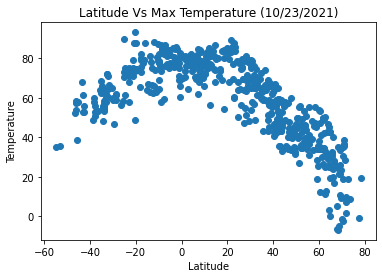

There is a close grouping of temperature depending on the latitude. It seems like a form of quadratic function.


In [7]:
lvt_x = clean_df['Latitude']
lvt_y = clean_df['Max Temperature']

# Create Plot
plt.scatter(lvt_x,lvt_y)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude Vs Max Temperature (10/23/2021)')

# Show plot
plt.savefig("Output/Latitude VS Temperature.png")
plt.show()

print('There is a close grouping of temperature depending on the latitude. It seems like a form of quadratic function.')

## Latitude vs. Humidity Plot

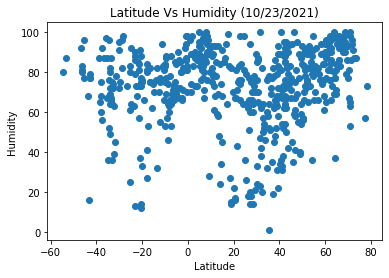

It does not look like there is any strong correlation between humidity and latitude


In [8]:
hum_x = clean_df['Latitude']
hum_y = clean_df['Humidity']

# Create Plot
plt.scatter(hum_x,hum_y)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude Vs Humidity (10/23/2021)')

# Show plot
plt.savefig("Output/Latitude VS Humidity.png")
plt.show()

print("It does not look like there is any strong correlation between humidity and latitude")

## Latitude vs. Cloudiness Plot

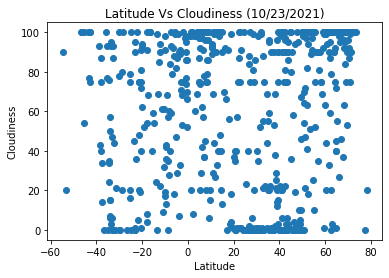

It does not look like there is any strong correlation between cloudiness and latitude


In [9]:
cloud_x = clean_df['Latitude']
cloud_y = clean_df['Cloudiness']

# Create Plot
plt.scatter(cloud_x,cloud_y)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs Cloudiness (10/23/2021)')


# Show plot
plt.savefig("Output/Latitude Vs Cloudiness.png")
plt.show()

print("It does not look like there is any strong correlation between cloudiness and latitude")

## Latitude vs. Wind Speed Plot

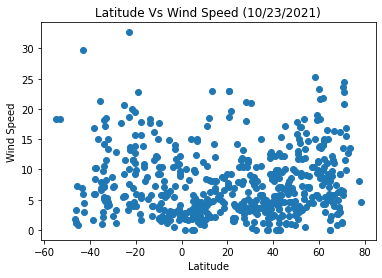

It does not look like there is any strong correlation between wind speed and latitude


In [10]:
windspeed_x = clean_df['Latitude']
windspeed_y = clean_df['Wind Speed']

# Create Plot
plt.scatter(windspeed_x,windspeed_y)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude Vs Wind Speed (10/23/2021)')

# Show plot
plt.savefig("Output/Latitude Vs Wind Speed.png")
plt.show()

print("It does not look like there is any strong correlation between wind speed and latitude")

## Linear Regression

In [11]:
south_df = clean_df.loc[clean_df['Latitude']<0]
north_df = clean_df.loc[clean_df['Latitude']>0]

In [12]:
south_df

,City Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Datetime
2,Atuona,-9.8000,-139.0333,78.35,77,13,17.65,PF,-34200
3,Vilcún,-38.6500,-72.2333,48.94,87,93,1.72,CL,-10800
4,Rikitea,-23.1203,-134.9692,75.16,79,90,18.61,PF,-32400
5,Mataura,-46.1927,168.8643,58.46,80,100,1.30,NZ,46800
7,Cape Town,-33.9258,18.4232,56.12,72,15,5.44,ZA,7200
...,...,...,...,...,...,...,...,...,...
537,Contamana,-7.3333,-75.0167,86.72,53,59,5.44,PE,-18000
551,Huarmey,-10.0681,-78.1522,64.36,83,17,10.38,PE,-18000
552,Santa Fe,-31.6333,-60.7000,66.74,78,21,4.07,AR,-10800
557,Puerto Baquerizo Moreno,-0.9000,-89.6000,69.01,86,95,10.98,EC,-21600


In [13]:
north_df

,City Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Datetime
0,São Filipe,14.8961,-24.4956,79.63,68,13,8.12,CV,-3600
1,Kosa,59.9445,54.9977,34.29,94,63,5.35,RU,18000
6,Strezhevoy,60.7333,77.5889,40.98,89,94,13.60,RU,25200
8,Måløy,61.9353,5.1136,49.73,81,100,14.00,NO,7200
9,Torbay,47.6666,-52.7314,59.68,95,100,1.01,CA,-9000
...,...,...,...,...,...,...,...,...,...
550,Pandan,14.0453,124.1694,81.00,84,100,8.10,PH,28800
553,Seryshevo,51.0933,128.3786,39.69,73,21,3.49,RU,32400
554,Hammerfest,70.6634,23.6821,30.65,100,75,5.75,NO,7200
555,Siocon,7.7061,122.1353,79.18,85,100,2.73,PH,28800


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

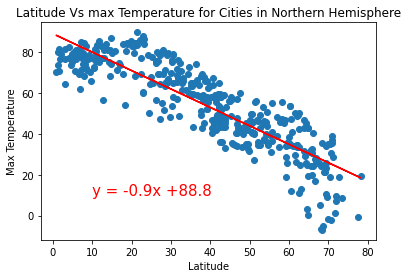

The r-value is: 0.77
There is a good linear correlation between latitude and max temperature in the northern hemisphere


In [14]:
maxtemp_nh_x = north_df['Latitude']
maxtemp_nh_y = north_df['Max Temperature']

# Perform a linear regression on temperature vs. latitude
(maxtemp_nh_slope, maxtemp_nh_intercept, maxtemp_nh_rvalue, maxtemp_nh_pvalue, maxtemp_nh_stderr) = linregress(maxtemp_nh_x, maxtemp_nh_y)

# Regression Fomula
maxtemp_nh_regress_values = maxtemp_nh_x * maxtemp_nh_slope + maxtemp_nh_intercept

# Create line equation string
maxtemp_nh_line_eq = "y = " + str(round(maxtemp_nh_slope,2)) + "x +" + str(round(maxtemp_nh_intercept,2))

# Create Plot
plt.scatter(maxtemp_nh_x,maxtemp_nh_y)
plt.plot(maxtemp_nh_x,maxtemp_nh_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude Vs max Temperature for Cities in Northern Hemisphere')
plt.annotate(maxtemp_nh_line_eq,(10,10),fontsize=15,color="red")

# Show plot
plt.savefig("Output/Max Temp vs. Latitude Linear Regression.png")
plt.show()

# Print r value
print(f"The r-value is: {round(maxtemp_nh_rvalue**2,2)}")
print(f'There is a good linear correlation between latitude and max temperature in the northern hemisphere')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

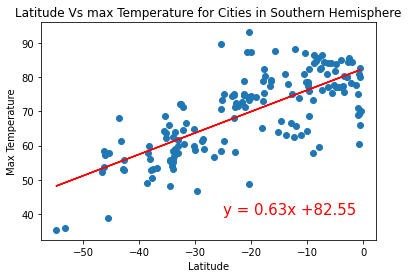

The r-value is: 0.54
There is a relatively good linear correlation between latitude and max temperature in the southern hemisphere, though not as good as the northern hemisphere data


In [15]:
maxtemp_sh_x = south_df['Latitude']
maxtemp_sh_y = south_df['Max Temperature']

# Perform a linear regression on temperature vs. latitude
(maxtemp_sh_slope, maxtemp_sh_intercept, maxtemp_sh_rvalue, maxtemp_sh_pvalue, maxtemp_sh_stderr) = linregress(maxtemp_sh_x, maxtemp_sh_y)

# Regression Fomula
maxtemp_sh_regress_values = maxtemp_sh_x * maxtemp_sh_slope + maxtemp_sh_intercept

# Create line equation string
maxtemp_sh_line_eq = "y = " + str(round(maxtemp_sh_slope,2)) + "x +" + str(round(maxtemp_sh_intercept,2))

# Create Plot
plt.scatter(maxtemp_sh_x,maxtemp_sh_y)
plt.plot(maxtemp_sh_x,maxtemp_sh_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude Vs max Temperature for Cities in Southern Hemisphere')
plt.annotate(maxtemp_sh_line_eq,(-25,40),fontsize=15,color="red")

# Show plot
plt.savefig("Output/Latitude Vs max Temperature for Cities in Southern Hemisphere.png")
plt.show()

# Print r value
print(f"The r-value is: {round(maxtemp_sh_rvalue**2,2)}")
print(f'There is a relatively good linear correlation between latitude and max temperature in the southern hemisphere, though not as good as the northern hemisphere data')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

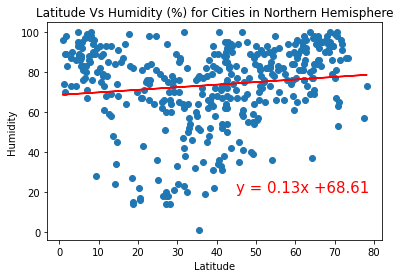

The r-value is: 0.02
There is no correlation in this set of data.


In [16]:
hum_nh_x = north_df['Latitude']
hum_nh_y = north_df['Humidity']

# Perform a linear regression on Humidity vs. latitude
(hum_nh_slope, hum_nh_intercept, hum_nh_rvalue, hum_nh_pvalue, hum_nh_stderr) = linregress(hum_nh_x, hum_nh_y)

# Regression Fomula
hum_nh_regress_values = hum_nh_x * hum_nh_slope + hum_nh_intercept

# Create line equation string
hum_nh_line_eq = "y = " + str(round(hum_nh_slope,2)) + "x +" + str(round(hum_nh_intercept,2))

# Create Plot
plt.scatter(hum_nh_x,hum_nh_y)
plt.plot(hum_nh_x,hum_nh_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude Vs Humidity (%) for Cities in Northern Hemisphere')
plt.annotate(hum_nh_line_eq,(45,20),fontsize=15,color="red")

# Show plot
plt.savefig("Output/Latitude Vs Humidity for Cities in Northern Hemisphere.png")
plt.show()

# Print r value
print(f"The r-value is: {round(hum_nh_rvalue**2,2)}")
print('There is no correlation in this set of data.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

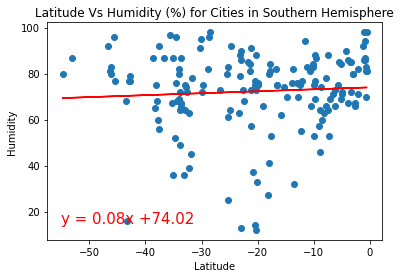

The r-value is: 0.0
There is no correlation in this set of data.


In [17]:
hum_sh_x = south_df['Latitude']
hum_sh_y = south_df['Humidity']

# Perform a linear regression on Humidity vs. latitude
(hum_sh_slope, hum_sh_intercept, hum_sh_rvalue, hum_sh_pvalue, hum_sh_stderr) = linregress(hum_sh_x, hum_sh_y)

# Regression Fomula
hum_sh_regress_values = hum_sh_x * hum_sh_slope + hum_sh_intercept

# Create line equation string
hum_sh_line_eq = "y = " + str(round(hum_sh_slope,2)) + "x +" + str(round(hum_sh_intercept,2))

# Create Plot
plt.scatter(hum_sh_x,hum_sh_y)
plt.plot(hum_sh_x,hum_sh_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude Vs Humidity (%) for Cities in Southern Hemisphere')
plt.annotate(hum_sh_line_eq,(-55,15),fontsize=15,color="red")

# Show plot
plt.savefig("Output/Latitude Vs Humidity for Cities in Southern Hemisphere.png")
plt.show()

# Print r value
print(f"The r-value is: {round(hum_sh_rvalue**2,2)}")
print('There is no correlation in this set of data.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

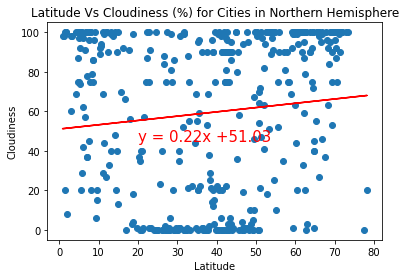

The r-value is: 0.01
There is no correlation in this set of data.


In [18]:
cloud_nh_x = north_df['Latitude']
cloud_nh_y = north_df['Cloudiness']

# Perform a linear regression on Cloudiness vs. latitude
(cloud_nh_slope, cloud_nh_intercept, cloud_nh_rvalue, cloud_nh_pvalue, cloud_nh_stderr) = linregress(cloud_nh_x, cloud_nh_y)

# Regression Fomula
cloud_nh_regress_values = cloud_nh_x * cloud_nh_slope + cloud_nh_intercept

# Create line equation string
cloud_nh_line_eq = "y = " + str(round(cloud_nh_slope,2)) + "x +" + str(round(cloud_nh_intercept,2))

# Create Plot
plt.scatter(cloud_nh_x,cloud_nh_y)
plt.plot(cloud_nh_x,cloud_nh_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs Cloudiness (%) for Cities in Northern Hemisphere')
plt.annotate(cloud_nh_line_eq,(20,45),fontsize=15,color="red")

# Show plot
plt.savefig("Output/Latitude Vs Cloudiness (%) for Cities in Northern Hemisphere.png")
plt.show()

# Print r value
print(f"The r-value is: {round(cloud_nh_rvalue**2,2)}")
print('There is no correlation in this set of data.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

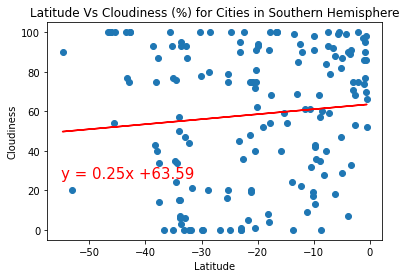

The r-value is: 0.01
There is no correlation in this set of data.


In [19]:
cloud_sh_x = south_df['Latitude']
cloud_sh_y = south_df['Cloudiness']

# Perform a linear regression on Cloudiness vs. latitude
(cloud_sh_slope, cloud_sh_intercept, cloud_sh_rvalue, cloud_sh_pvalue, cloud_sh_stderr) = linregress(cloud_sh_x, cloud_sh_y)

# Regression Fomula
cloud_sh_regress_values = cloud_sh_x * cloud_sh_slope + cloud_sh_intercept

# Create line equation string
cloud_sh_line_eq = "y = " + str(round(cloud_sh_slope,2)) + "x +" + str(round(cloud_sh_intercept,2))

# Create Plot
plt.scatter(cloud_sh_x,cloud_sh_y)
plt.plot(cloud_sh_x,cloud_sh_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs Cloudiness (%) for Cities in Southern Hemisphere')
plt.annotate(cloud_sh_line_eq,(-55,26),fontsize=15,color="red")

# Show plot
plt.savefig("Output/Latitude Vs Cloudiness for Cities in Southern Hemisphere.png")
plt.show()

# Print r value
print(f"The r-value is: {round(cloud_sh_rvalue**2,2)}")
print('There is no correlation in this set of data.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

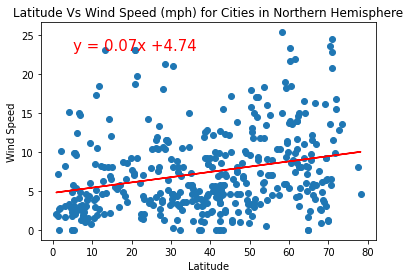

The r-value is: 0.07
There is no correlation in this set of data.


In [20]:
windspeed_nh_x = north_df['Latitude']
windspeed_nh_y = north_df['Wind Speed']

# Perform a linear regression on Wind speed vs. latitude
(windspeed_nh_slope, windspeed_nh_intercept, windspeed_nh_rvalue, windspeed_nh_pvalue, windspeed_nh_stderr) = linregress(windspeed_nh_x, windspeed_nh_y)

# Regression Fomula
windspeed_nh_regress_values = windspeed_nh_x * windspeed_nh_slope + windspeed_nh_intercept

# Create line equation string
windspeed_nh_line_eq = "y = " + str(round(windspeed_nh_slope,2)) + "x +" + str(round(windspeed_nh_intercept,2))

# Create Plot
plt.scatter(windspeed_nh_x,windspeed_nh_y)
plt.plot(windspeed_nh_x,windspeed_nh_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude Vs Wind Speed (mph) for Cities in Northern Hemisphere')
plt.annotate(windspeed_nh_line_eq,(5,23),fontsize=15,color="red")

# Show plot
plt.savefig("Output/Latitude Vs Wind Speed for Cities in Northern Hemisphere.png")
plt.show()

# Print r value
print(f"The r-value is: {round(windspeed_nh_rvalue**2,2)}")
print('There is no correlation in this set of data.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

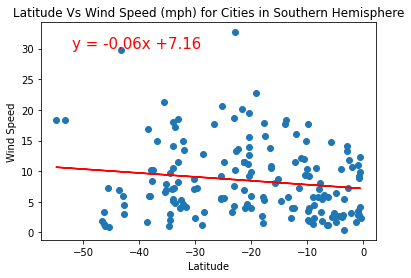

The r-value is: 0.02
There is no correlation in this set of data.


In [21]:
windspeed_sh_x = south_df['Latitude']
windspeed_sh_y = south_df['Wind Speed']

# Perform a linear regression on Wind speed vs. latitude
(windspeed_sh_slope, windspeed_sh_intercept, windspeed_sh_rvalue, windspeed_sh_pvalue, windspeed_sh_stderr) = linregress(windspeed_sh_x, windspeed_sh_y)

# Regression Fomula
windspeed_sh_regress_values = windspeed_sh_x * windspeed_sh_slope + windspeed_sh_intercept

# Create line equation string
windspeed_sh_line_eq = "y = " + str(round(windspeed_sh_slope,2)) + "x +" + str(round(windspeed_sh_intercept,2))

# Create Plot
plt.scatter(windspeed_sh_x,windspeed_sh_y)
plt.plot(windspeed_sh_x,windspeed_sh_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude Vs Wind Speed (mph) for Cities in Southern Hemisphere')
plt.annotate(windspeed_sh_line_eq,(-52,30),fontsize=15,color="red")

# Show plot
plt.savefig("Output/Latitude Vs Wind Speed for Cities in Southern Hemisphere.png")
plt.show()

# Print r value
print(f"The r-value is: {round(windspeed_sh_rvalue**2,2)}")
print('There is no correlation in this set of data.')

In [22]:
print('Final Conclusion')
print('- Temperature have a relatively strong correlation to the latitude of the City')
print('- For the correlation between temperature and latitude, it appears that theere is a stronger correlation in the northern hemisphere when compared to the southern hemisphere')
print('- Humidity, Cloudiness & Wind speed does not appear to have any correlation to the latitude of the city.')

Final Conclusion
- Temperature have a relatively strong correlation to the latitude of the City
- For the correlation between temperature and latitude, it appears that theere is a stronger correlation in the northern hemisphere when compared to the southern hemisphere
- Humidity, Cloudiness & Wind speed does not appear to have any correlation to the latitude of the city.
